In [1]:
!pip install shap

In [2]:
import numpy as np
import pandas as pd
import shap
import warnings

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_Caucasian,race_AfricanAmerican,gender_Female,age_[70-80),age_[60-70),age_[50-60),age_[80-90),age_[40-50),payer_code_?,payer_code_MC,payer_code_HM,payer_code_SP,payer_code_BC,medical_specialty_?,medical_specialty_InternalMedicine,medical_specialty_Emergency/Trauma,medical_specialty_Family/GeneralPractice,medical_specialty_Cardiology,diag_1_428,diag_1_414,diag_1_786,diag_2_276,diag_2_428,diag_2_250,diag_2_427,diag_3_250,diag_3_401,diag_3_276,diag_3_428,max_glu_serum_None,A1Cresult_None,metformin_No,repaglinide_No,nateglinide_No,chlorpropamide_No,glimepiride_No,acetohexamide_No,glipizide_No,glyburide_No,tolbutamide_No,pioglitazone_No,rosiglitazone_No,acarbose_No,miglitol_No,troglitazone_No,tolazamide_No,examide_No,citoglipton_No,insulin_No,glyburide-metformin_No,glipizide-metformin_No,glimepiride-pioglitazone_No,metformin-rosiglitazone_No,metformin-pioglitazone_No,change_No,diabetesMed_Yes,readmitted
0,14,41,0,11,0,0,0,6,True,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,0
1,2,30,0,12,0,0,1,9,True,False,True,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,False,True,True,True,True,True,False,True,1
2,5,66,0,22,1,0,2,9,True,False,True,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,1
3,3,63,0,8,0,0,0,8,True,False,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,1
4,5,40,0,6,0,0,1,9,True,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,0


In [5]:
df.shape

(25000, 65)

In [6]:
X = df[['number_inpatient', 'num_medications', 'number_diagnoses', 'num_lab_procedures', 'num_procedures', 
        'time_in_hospital', 'number_outpatient', 'number_emergency', 'gender_Female', 'payer_code_?', 'medical_specialty_?', 
        'diag_1_428', 'diag_1_414', 'diabetesMed_Yes', 'A1Cresult_None']]

Y = df[['readmitted']]

In [7]:
df.head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_Caucasian,race_AfricanAmerican,gender_Female,age_[70-80),age_[60-70),age_[50-60),age_[80-90),age_[40-50),payer_code_?,payer_code_MC,payer_code_HM,payer_code_SP,payer_code_BC,medical_specialty_?,medical_specialty_InternalMedicine,medical_specialty_Emergency/Trauma,medical_specialty_Family/GeneralPractice,medical_specialty_Cardiology,diag_1_428,diag_1_414,diag_1_786,diag_2_276,diag_2_428,diag_2_250,diag_2_427,diag_3_250,diag_3_401,diag_3_276,diag_3_428,max_glu_serum_None,A1Cresult_None,metformin_No,repaglinide_No,nateglinide_No,chlorpropamide_No,glimepiride_No,acetohexamide_No,glipizide_No,glyburide_No,tolbutamide_No,pioglitazone_No,rosiglitazone_No,acarbose_No,miglitol_No,troglitazone_No,tolazamide_No,examide_No,citoglipton_No,insulin_No,glyburide-metformin_No,glipizide-metformin_No,glimepiride-pioglitazone_No,metformin-rosiglitazone_No,metformin-pioglitazone_No,change_No,diabetesMed_Yes,readmitted
0,14,41,0,11,0,0,0,6,True,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,0
1,2,30,0,12,0,0,1,9,True,False,True,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,False,True,True,True,True,True,False,True,1
2,5,66,0,22,1,0,2,9,True,False,True,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,1
3,3,63,0,8,0,0,0,8,True,False,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,1
4,5,40,0,6,0,0,1,9,True,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,0


In [8]:
df.shape

(25000, 65)

In [9]:
Y.head()

,readmitted
0,0
1,1
2,1
3,1
4,0


In [10]:
X = X.astype('float')

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 123)

In [13]:
rf = RandomForestClassifier(n_estimators = 30, random_state = 123)

rf.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=30, random_state=123)

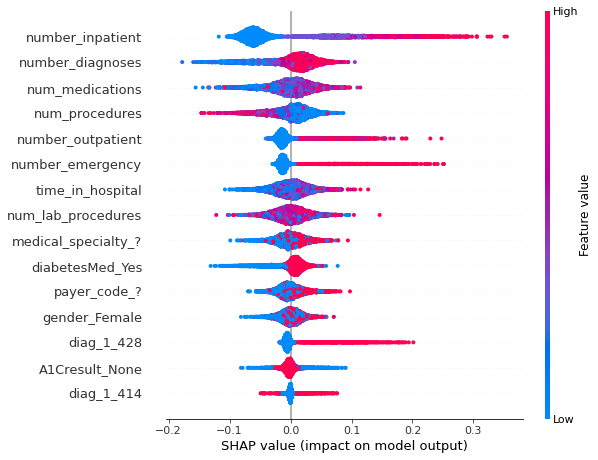

In [14]:
sh = shap.TreeExplainer(rf)
sh_val = sh.shap_values(X_test)

shap.summary_plot(sh_val[1], X_test)

In [15]:
pred = rf.predict(X_test)

print("Accuracy Score: ", accuracy_score(Y_test, pred))

print("Classification Report: \n", classification_report(Y_test, pred))

print("confusion matrix: \n", confusion_matrix(Y_test, pred))

Accuracy Score:  0.5932
Classification Report: 
               precision    recall  f1-score   support

           0       0.61      0.70      0.65      2722
           1       0.56      0.47      0.51      2278

    accuracy                           0.59      5000
   macro avg       0.59      0.58      0.58      5000
weighted avg       0.59      0.59      0.59      5000

confusion matrix: 
 [[1899  823]
 [1211 1067]]
